# sms spam collection

In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
data = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'messege'])
data.head()

,label,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
data.describe()

,label,messege
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [77]:
data.groupby('label').describe()

messege                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [78]:
data['length'] = data['messege'].apply(len)

In [79]:
data.head()

,label,messege,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

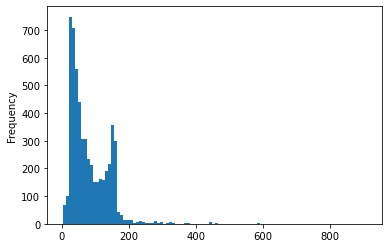

In [80]:
data['length'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

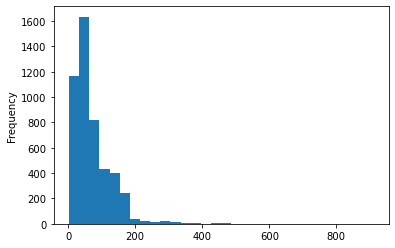

In [81]:
data[data['label'] == 'ham']['length'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

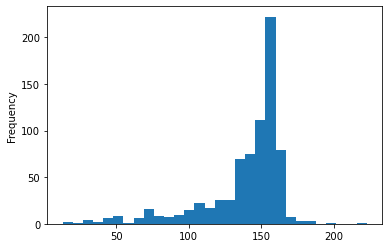

In [82]:
data[data['label'] == 'spam']['length'].plot.hist(bins=30)

In [83]:
data[data['length'] == data['length'].max()]['messege'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

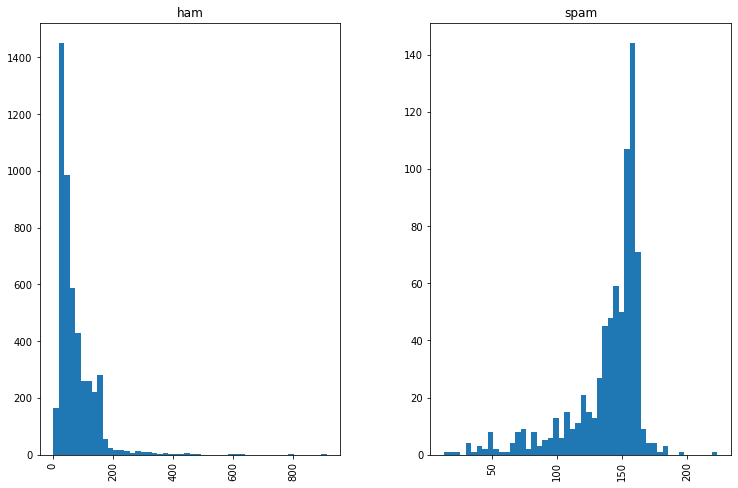

In [84]:
data.hist(column='length', by='label', figsize=(12,8), bins=50)

In [85]:
import string

In [86]:
mess = 'hello! This is a test. about, me. and you'

In [87]:
nopunc = [c for c in mess if c not in string.punctuation]

In [88]:
nopunc = ''.join(nopunc)

In [89]:
from nltk.corpus import stopwords

In [90]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
nopunc.split()

['hello', 'This', 'is', 'a', 'test', 'about', 'me', 'and', 'you']

In [92]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [93]:
clean_mess

['hello', 'test']

In [94]:
' '.join(clean_mess)

'hello test'

In [95]:
def text_process(text):
    
    nopunc = [word for word in text if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [96]:
data['messege'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messege, dtype: object

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['messege'])

In [100]:
print(len(bow_transformer.vocabulary_))

11425


In [101]:
mess4 = data['messege'][3]

In [103]:
bow4 = bow_transformer.transform([mess4])

In [106]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [107]:
print(np.shape(bow4))

(1, 11425)


In [110]:
bow_transformer.get_feature_names()[4068]

'U'

In [112]:
message_bow = bow_transformer.transform(data['messege'])

In [115]:
print(message_bow.shape)

(5572, 11425)


In [117]:
message_bow.nnz

50548

In [118]:
sparsity = ((100 * message_bow.nnz) / (message_bow.shape[0] * message_bow.shape[1]))
sparsity

0.07940295412668218

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer

In [120]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [124]:
tfidf4 = tfidf_transformer.transform(bow4)

In [126]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [128]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [129]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [131]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, data['label'])

In [132]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [134]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [135]:
from sklearn.pipeline import Pipeline

In [136]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier', MultinomialNB())
])

In [137]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(data['messege'], data['label'], test_size=0.3)

In [142]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000015346680EE0>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [145]:
prediction = pipeline.predict(X_test)

In [144]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.90      1672
weighted avg       0.96      0.96      0.96      1672



# Yelp

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
yelp = pd.read_csv('yelp.csv')

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [11]:
yelp['type'].nunique()

1

In [12]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [55]:
data = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)][['stars', 'text']]

In [56]:
data.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
6,5,Drop what you're doing and drive here. After I...


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   4086 non-null   int64 
 1   text    4086 non-null   object
dtypes: int64(1), object(1)
memory usage: 95.8+ KB


In [58]:
data['stars'].nunique()

2

In [59]:
import string
import nltk

In [60]:
from nltk.corpus import stopwords

In [38]:
def text_processing(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [61]:
len(text_processing(data.loc[0]['text']))

81

In [62]:
len(data.loc[0]['text'].split(' '))

160

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [75]:
pipeline = Pipeline([
    
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('kind', MultinomialNB())
])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['stars'], test_size=0.3)

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('kind', MultinomialNB())])

In [78]:
prediction = pipeline.predict(X_test)

In [79]:
print('Without analyzer:\n', classification_report(y_test, prediction))

Without analyzer:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       210
           5       0.83      1.00      0.91      1016

    accuracy                           0.83      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.69      0.83      0.75      1226



C:\Users\saada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print('With analyzer:\n', classification_report(y_test, prediction))

With analyzer:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       215
           5       0.82      1.00      0.90      1011

    accuracy                           0.82      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.68      0.82      0.75      1226



C:\Users\saada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
pipeline = Pipeline([
    
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('kind', RandomForestClassifier())
])

In [83]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('kind', RandomForestClassifier())])

In [84]:
prediction = pipeline.predict(X_test)

In [85]:
print('Random Forest Without analyzer:\n', classification_report(y_test, prediction))

Random Forest Without analyzer:
               precision    recall  f1-score   support

           1       1.00      0.22      0.36       210
           5       0.86      1.00      0.93      1016

    accuracy                           0.87      1226
   macro avg       0.93      0.61      0.64      1226
weighted avg       0.88      0.87      0.83      1226



In [86]:
pipeline = Pipeline([
    
    ('bow', CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('kind', RandomForestClassifier())
])

In [87]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x0000022905E704C0>)),
                ('tfidf', TfidfTransformer()),
                ('kind', RandomForestClassifier())])

In [88]:
prediction = pipeline.predict(X_test)

In [89]:
print('Random Forest With analyzer:\n', classification_report(y_test, prediction))

Random Forest With analyzer:
               precision    recall  f1-score   support

           1       0.98      0.19      0.32       210
           5       0.86      1.00      0.92      1016

    accuracy                           0.86      1226
   macro avg       0.92      0.59      0.62      1226
weighted avg       0.88      0.86      0.82      1226

